In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotnine as gg
import umap


## loading data

In [3]:
top_dir = '/Users/habbasi/Desktop/'
proj_dir = 'modes'



class load_data:
    
    
    def __init__(self,top_dir,proj_dir):
        
        self.top_dir = top_dir
        self.proj_dir = proj_dir
    
    
    def csvpath(self):
        plates = ["SQ00015201", "SQ00015142", "SQ00015143", "SQ00015144", "SQ00015145"]
        
        spath = [os.path.join(self.top_dir, self.proj_dir, p + "_dmso.csv") for p in plates]  

        return spath
    
    def featlist(self):
        path = os.path.join(self.top_dir, self.proj_dir,'input','feature_list.txt')
        fealist = np.loadtxt(str(path), dtype=str).tolist()
        return fealist
    
    
    
    
subclass = load_data(top_dir, proj_dir)   

csvlist = subclass.csvpath()


featlist = subclass.featlist()

csvlist

['/Users/habbasi/Desktop/modes/SQ00015201_dmso.csv',
 '/Users/habbasi/Desktop/modes/SQ00015142_dmso.csv',
 '/Users/habbasi/Desktop/modes/SQ00015143_dmso.csv',
 '/Users/habbasi/Desktop/modes/SQ00015144_dmso.csv',
 '/Users/habbasi/Desktop/modes/SQ00015145_dmso.csv']

In [5]:
metalist = ['Image_FileName_OrigMito',
 'Image_FileName_OrigER',
 'Image_PathName_OrigER',
 'Metadata_mg_per_ml',
 'Image_PathName_OrigDNA',
 'Image_PathName_OrigRNA',
 'Image_PathName_OrigMito',
 'Image_FileName_OrigDNA',
 'Image_FileName_OrigRNA',
 'Metadata_broad_sample',
 'Image_Metadata_Well',
 'Metadata_plate_map_name',
 'Metadata_mmoles_per_liter',
 'Image_FileName_CellOutlines',
 'Image_Metadata_Site',
 'Metadata_Plate',
 'Image_FileName_OrigAGP',
 'Image_PathName_CellOutlines',
 'Image_PathName_OrigAGP',
 'Cells_Location_Center_X',
 'Cells_Location_Center_Y',
 'Nuclei_Location_Center_X',
 'Nuclei_Location_Center_Y',
 'Cytoplasm_Location_Center_X',
 'Cytoplasm_Location_Center_Y',
 'ObjectNumber']

## UMAP visualization of DMSO cells

In [6]:
combined = []
for csv in csvlist:
    dmso = pd.read_csv(csv)
    
    metadata = (dmso.loc[:, metalist]
            .rename(columns={'Cells_Location_Center_X':'Metadata_Cells_Location_Center_X',
                            'Cells_Location_Center_Y':'Metadata_Cells_Location_Center_Y',
                            'Nuclei_Location_Center_X':'Metadata_Nuclei_Location_Center_X',
                            'Nuclei_Location_Center_Y':'Metadata_Nuclei_Location_Center_Y',
                            'Cytoplasm_Location_Center_X':'Metadata_Cytoplasm_Location_Center_X',
                            'Cytoplasm_Location_Center_Y':'Metadata_Cytoplasm_Location_Center_Y',
                            'ObjectNumber': 'Metadata_ObjectNumber'})
           )
    metadata.columns = metadata.columns.str.replace('Image_', "Metadata_")
    
    df_var = dmso.loc[:, featlist]
    
    # Z normalized features
    
    scale = StandardScaler()

    scaled_data = scale.fit_transform(df_var.values)

    df = pd.DataFrame(scaled_data, columns= df_var.columns)
    
    ## UMAP fitting
    
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(df.values)
    test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
    comb = test.merge(dmso.loc[:, metalist], left_index=True, right_index=True)
    
    
    
  
    combined.append(comb)
   
final = pd.concat(combined) 


In [7]:
final.head()

,UMAP-1,UMAP-2,Image_FileName_OrigMito,Image_FileName_OrigER,Image_PathName_OrigER,Metadata_mg_per_ml,Image_PathName_OrigDNA,Image_PathName_OrigRNA,Image_PathName_OrigMito,Image_FileName_OrigDNA,...,Image_FileName_OrigAGP,Image_PathName_CellOutlines,Image_PathName_OrigAGP,Cells_Location_Center_X,Cells_Location_Center_Y,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Cytoplasm_Location_Center_X,Cytoplasm_Location_Center_Y,ObjectNumber
0,9.865514,4.063509,r01c01f01p01-ch5sk1fk1fl1.tiff,r01c01f01p01-ch2sk1fk1fl1.tiff,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,NaN,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c01f01p01-ch1sk1fk1fl1.tiff,...,r01c01f01p01-ch4sk1fk1fl1.tiff,/home/ubuntu/local_output/SQ00015201-A01-1/out...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,1163.370711,34.127565,1151.851156,36.121869,1168.447151,33.229605,1
1,9.558078,4.251432,r01c01f01p01-ch5sk1fk1fl1.tiff,r01c01f01p01-ch2sk1fk1fl1.tiff,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,NaN,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c01f01p01-ch1sk1fk1fl1.tiff,...,r01c01f01p01-ch4sk1fk1fl1.tiff,/home/ubuntu/local_output/SQ00015201-A01-1/out...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,1764.180372,66.566478,1762.932963,70.192781,1764.860242,64.532906,2
2,9.957463,2.018987,r01c01f01p01-ch5sk1fk1fl1.tiff,r01c01f01p01-ch2sk1fk1fl1.tiff,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,NaN,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c01f01p01-ch1sk1fk1fl1.tiff,...,r01c01f01p01-ch4sk1fk1fl1.tiff,/home/ubuntu/local_output/SQ00015201-A01-1/out...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,688.756873,84.660890,671.612855,72.722749,693.488508,87.961753,3
3,11.686577,2.257458,r01c01f01p01-ch5sk1fk1fl1.tiff,r01c01f01p01-ch2sk1fk1fl1.tiff,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,NaN,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c01f01p01-ch1sk1fk1fl1.tiff,...,r01c01f01p01-ch4sk1fk1fl1.tiff,/home/ubuntu/local_output/SQ00015201-A01-1/out...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,1505.034750,93.033642,1506.989515,74.776322,1504.528551,97.843190,4
4,13.201120,3.283831,r01c01f01p01-ch5sk1fk1fl1.tiff,r01c01f01p01-ch2sk1fk1fl1.tiff,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,NaN,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c01f01p01-ch1sk1fk1fl1.tiff,...,r01c01f01p01-ch4sk1fk1fl1.tiff,/home/ubuntu/local_output/SQ00015201-A01-1/out...,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,1685.021657,103.833464,1665.278481,78.712858,1691.270817,111.740324,5


In [6]:
meta = [col for col in final.columns if "Metadata" in col]
variable = [col for col in final.columns if not "Metadata" in col]
fn = final.loc[:, variable]
fn

,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_InverseDifferenceMoment_RNA_10_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_DNA_5_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_Variance_RNA_10_0
0,-0.907841,-0.718336,-0.632286,1.684153,1.833477,1.728809,1.098343,0.484669,-0.723509,0.635284,...,0.546264,-1.415598,1.920228,0.244975,0.762253,-0.999242,0.505694,0.437080,0.409233,0.617352
1,-0.868055,-0.625824,-0.504853,0.298839,1.720285,0.416488,1.251731,-0.922969,-0.449802,-0.091811,...,-0.316205,0.226858,1.907185,0.557808,-0.301405,-0.692421,-0.684022,-0.289890,0.039486,0.519464
2,0.373364,-0.960036,-1.435739,2.178703,-0.528303,1.373026,2.000271,-0.147778,-1.117082,-0.753266,...,1.992522,0.822244,-0.883562,0.106449,-0.688732,-1.524665,0.905777,0.849772,-0.168054,-1.050427
3,-0.313837,-0.690590,-0.740768,0.025484,-0.448711,0.023998,0.900721,0.499605,-0.014733,-1.235723,...,-0.078618,-0.530302,-0.707507,0.420177,-0.297543,-0.149363,-0.137858,0.342193,0.199339,0.110529
4,-0.078061,2.810888,1.654577,-1.476949,-0.764712,-1.746501,-2.137839,-1.363612,-0.454698,-0.990389,...,1.257653,0.502430,0.923272,-0.311604,-0.441466,-1.609153,-1.485778,-1.441464,-1.715927,-1.687955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66982,-1.102277,-0.292917,0.331132,-0.252040,0.663728,-0.001404,-0.511780,1.178238,0.035147,-0.669640,...,-0.428139,-0.524937,-0.751263,-1.163143,-0.474760,1.029652,-0.243255,-0.254955,-0.708804,-0.264566
66983,-0.169215,0.922104,1.309830,-0.765989,0.223779,-0.022509,-0.961688,-0.319476,0.163368,0.194828,...,-0.731377,-0.124956,-0.283292,0.635049,1.031614,1.601028,1.628814,0.998014,0.045382,-1.404847
66984,-0.547017,-0.853151,-1.198848,1.028503,1.152751,0.762327,1.747852,-0.150165,-0.725886,0.415177,...,0.386474,-0.471512,-0.635779,0.244763,-0.993878,1.053081,0.683780,0.580483,0.399300,-0.016855
66985,-0.305681,0.317626,0.980146,-0.389531,1.190024,1.252126,-0.913716,-0.156434,-0.533989,-0.085581,...,-0.079918,1.025049,-0.143925,-0.529696,0.593049,0.325923,-0.397432,-0.494394,-0.537284,-0.412559


## Plotting

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/Modes_DMSO_UMAP.png


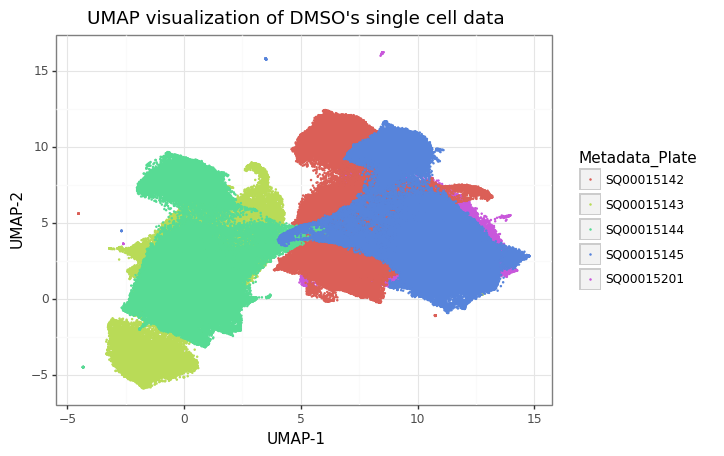

<ggplot: (7028373809)>

In [11]:
p = gg.ggplot(final, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_Plate')) + \
    gg.geom_point(size = 0.003) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP visualization of DMSO's single cell data") + \
    gg.theme_bw()
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
    
   


    

gg.ggsave(filename='Modes_DMSO_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

## Variables

In [39]:

metalist = ['Image_FileName_OrigMito',
 'Image_FileName_OrigER',
 'Image_PathName_OrigER',
 'Metadata_mg_per_ml',
 'Image_PathName_OrigDNA',
 'Image_PathName_OrigRNA',
 'Image_PathName_OrigMito',
 'Image_FileName_OrigDNA',
 'Image_FileName_OrigRNA',
 'Metadata_broad_sample',
 'Image_Metadata_Well',
 'Metadata_plate_map_name',
 'Metadata_mmoles_per_liter',
 'Image_FileName_CellOutlines',
 'Image_Metadata_Site',
 'Metadata_Plate',
 'Image_FileName_OrigAGP',
 'Image_PathName_CellOutlines',
 'Image_PathName_OrigAGP',
 'Cells_Location_Center_X',
 'Cells_Location_Center_Y',
 'Nuclei_Location_Center_X',
 'Nuclei_Location_Center_Y',
 'Cytoplasm_Location_Center_X',
 'Cytoplasm_Location_Center_Y',
 'ObjectNumber']

metadata = (dmso.loc[:, metalist]
            .rename(columns={'Cells_Location_Center_X':'Metadata_Cells_Location_Center_X',
                            'Cells_Location_Center_Y':'Metadata_Cells_Location_Center_Y',
                            'Nuclei_Location_Center_X':'Metadata_Nuclei_Location_Center_X',
                            'Nuclei_Location_Center_Y':'Metadata_Nuclei_Location_Center_Y',
                            'Cytoplasm_Location_Center_X':'Metadata_Cytoplasm_Location_Center_X',
                            'Cytoplasm_Location_Center_Y':'Metadata_Cytoplasm_Location_Center_Y',
                            'ObjectNumber': 'Metadata_ObjectNumber'})
           )
metadata.columns = metadata.columns.str.replace('Image_', "Metadata_")




# def difference(list1, list2):
#     return list(set(list1) ^ set(list2))

# ## Excluding Features

# exclude_BF = dmso.filter(regex='Center|ObjectNumber|TableNumber|Location|Count|Parent|Image|Metadata|Granularity_14|Granularity_15|Granularity_16|Manders|RWC|Costes').columns.tolist()
# var_left = difference(dmso.columns, exclude_BF)

# df_var = dmso.loc[:, var_left]

# df_var.head()

df_var = dmso.loc[:, featlist]
df_var.head()

metadata.columns

Index(['Metadata_FileName_OrigMito', 'Metadata_FileName_OrigER',
       'Metadata_PathName_OrigER', 'Metadata_mg_per_ml',
       'Metadata_PathName_OrigDNA', 'Metadata_PathName_OrigRNA',
       'Metadata_PathName_OrigMito', 'Metadata_FileName_OrigDNA',
       'Metadata_FileName_OrigRNA', 'Metadata_broad_sample',
       'Metadata_Metadata_Well', 'Metadata_plate_map_name',
       'Metadata_mmoles_per_liter', 'Metadata_FileName_CellOutlines',
       'Metadata_Metadata_Site', 'Metadata_Plate', 'Metadata_FileName_OrigAGP',
       'Metadata_PathName_CellOutlines', 'Metadata_PathName_OrigAGP',
       'Metadata_Cells_Location_Center_X', 'Metadata_Cells_Location_Center_Y',
       'Metadata_Nuclei_Location_Center_X',
       'Metadata_Nuclei_Location_Center_Y',
       'Metadata_Cytoplasm_Location_Center_X',
       'Metadata_Cytoplasm_Location_Center_Y', 'Metadata_ObjectNumber'],
      dtype='object')

## Data Preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# Z normalized features
scaled_data = scale.fit_transform(df_var.values)

df = pd.DataFrame(scaled_data, columns= df_var.columns)
# dm = metadata.merge(df, left_index=True, right_index=True)
# dm.head()

df.values

array([[-0.99298767, -0.16927444,  0.45270842, ...,  1.0995781 ,
         1.15184052,  1.08946272],
       [ 0.32093119, -0.09417693,  0.33067351, ...,  0.33728979,
        -0.55094768, -0.25111384],
       [-0.0762843 , -0.09074904,  0.72252164, ...,  1.01043206,
         0.84127568,  0.14506501],
       ...,
       [-0.4453092 , -0.56912932, -1.87179411, ...,  0.3544663 ,
         1.14919461,  0.157361  ],
       [-1.03595284, -0.48496136,  0.1653773 , ...,  0.99411576,
         0.43482673,  0.80584407],
       [-0.23795559, -0.45187198,  0.21639303, ...,  0.26316523,
         0.19106073, -1.08447944]])

In [17]:
dmso.shape

(68708, 2448)

In [6]:
# from sklearn.feature_selection import VarianceThreshold

# constant_filter = VarianceThreshold(threshold=0.005)
# constant_filter.fit(df_var.values)
# constant_columns = [col for col in df_var.columns
#                     if col not in df_var.columns[constant_filter.get_support()]]

# len(sorted(constant_columns))

In [35]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(df.values)
embedding.shape

(68708, 2)

In [36]:
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(dmso.loc[:, metalist], left_index=True, right_index=True)

In [37]:
combined.columns

Index(['UMAP-1', 'UMAP-2', 'Image_FileName_OrigMito', 'Image_FileName_OrigER',
       'Image_PathName_OrigER', 'Metadata_mg_per_ml', 'Image_PathName_OrigDNA',
       'Image_PathName_OrigRNA', 'Image_PathName_OrigMito',
       'Image_FileName_OrigDNA', 'Image_FileName_OrigRNA',
       'Metadata_broad_sample', 'Image_Metadata_Well',
       'Metadata_plate_map_name', 'Metadata_mmoles_per_liter',
       'Image_FileName_CellOutlines', 'Image_Metadata_Site', 'Metadata_Plate',
       'Image_FileName_OrigAGP', 'Image_PathName_CellOutlines',
       'Image_PathName_OrigAGP', 'Cells_Location_Center_X',
       'Cells_Location_Center_Y', 'Nuclei_Location_Center_X',
       'Nuclei_Location_Center_Y', 'Cytoplasm_Location_Center_X',
       'Cytoplasm_Location_Center_Y', 'ObjectNumber'],
      dtype='object')

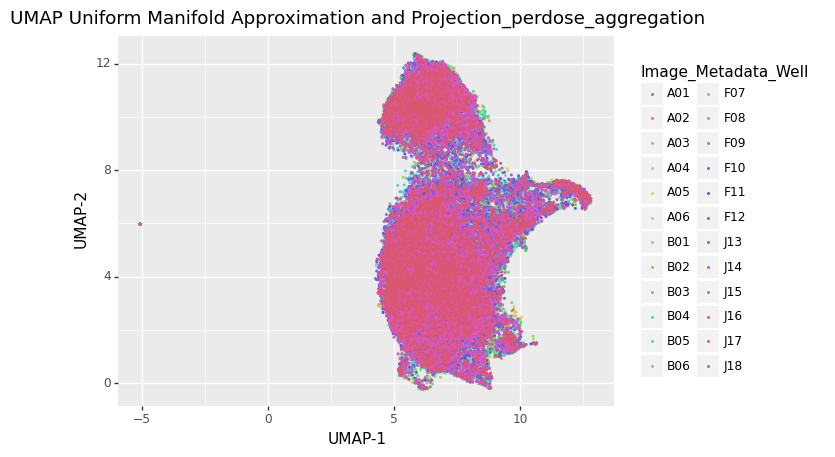

<ggplot: (7017667493)>

In [38]:
p = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Image_Metadata_Well')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection_perdose_aggregation") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

#ggsave(filename='Drug_target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 